In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.svm')

In [6]:
# Đọc dữ liệu
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('ToyotaCorolla.csv')

In [7]:
# Phân tích và kiểm tra dữ liệu
print(data.head())
pd.set_option('display.expand_frame_repr', False)

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1096 non-null   int64 
 1   Age        1096 non-null   int64 
 2   KM         1096 non-null   int64 
 3   FuelType   1096 non-null   object
 4   HP         1096 non-null   int64 
 5   MetColor   1096 non-null   int64 
 6   Automatic  1096 non-null   int64 
 7   CC         1096 non-null   int64 
 8   Doors      1096 non-null   int64 
 9   Weight     1096 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 85.8+ KB
None


In [ ]:
print(data.describe())
pd.set_option('display.expand_frame_repr', False)

              Price          Age             KM           HP     MetColor    Automatic           CC        Doors       Weight
count   1096.000000  1096.000000    1096.000000  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000
mean    9698.308394    61.354927   66319.827555   103.395985     0.666971     0.061131  1514.145985     4.000000  1053.338504
std     1800.368168    12.946710   25652.650170     9.959284     0.471512     0.239681   127.774847     0.949886    24.706153
min     5250.000000    22.000000       1.000000    86.000000     0.000000     0.000000  1300.000000     2.000000  1000.000000
25%     8250.000000    52.000000   47390.000000    97.000000     0.000000     0.000000  1400.000000     3.000000  1035.000000
50%     9500.000000    63.000000   64096.500000   110.000000     1.000000     0.000000  1600.000000     4.000000  1050.000000
75%    10950.000000    72.000000   83061.750000   110.000000     1.000000     0.000000  1600.000000     5.000000  1075

#### Kiểm tra missing value

In [ ]:
print(data.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


### Visualize the Data

Histograms


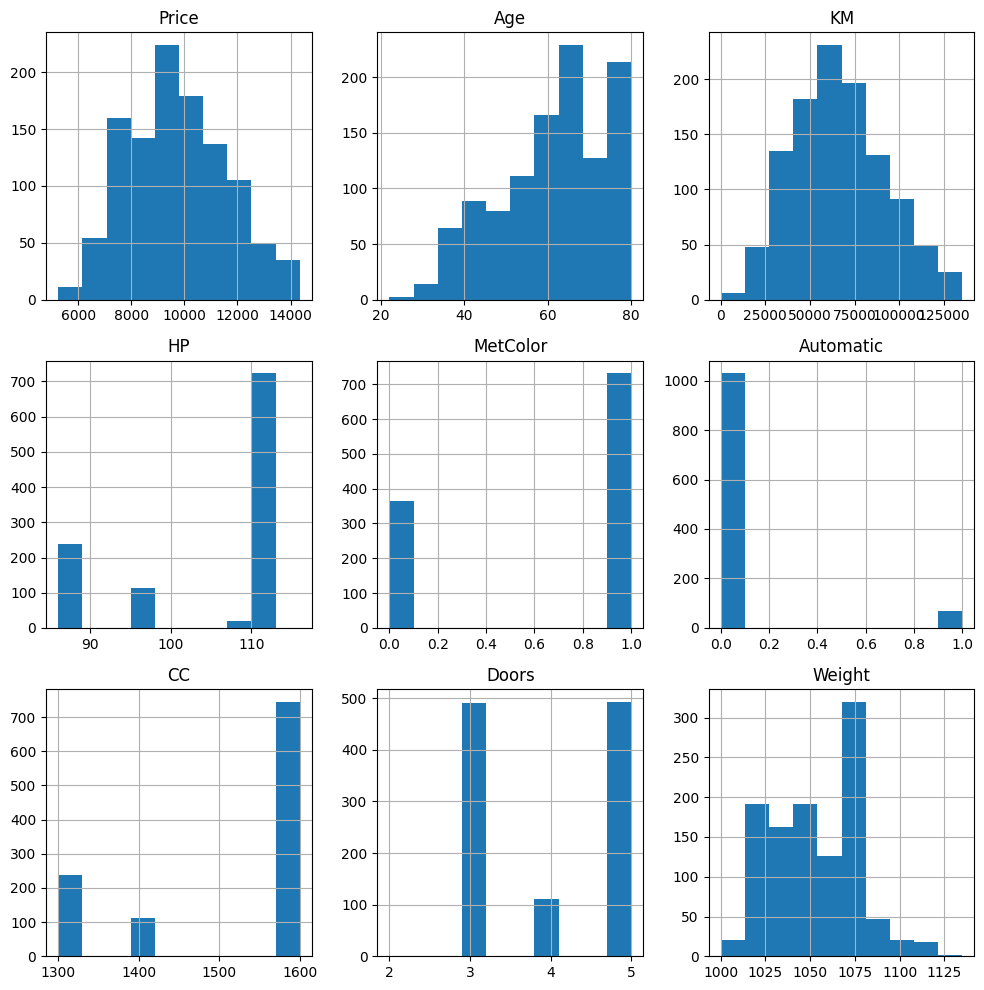

In [ ]:
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

Barplot

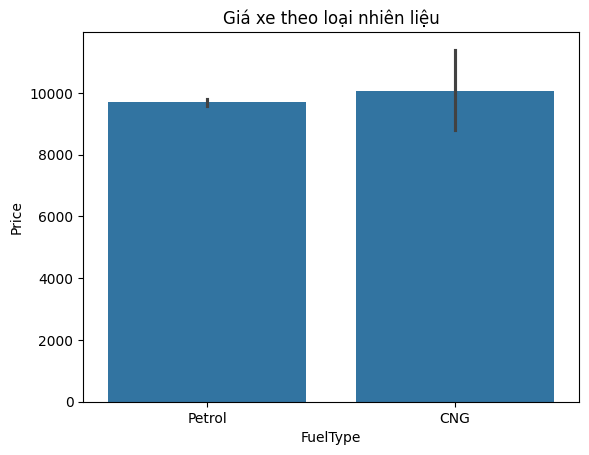

In [ ]:
# Biểu đồ bar cho giới tính và số vòng
sns.barplot (x="FuelType", y="Price", data=data)
plt.title("Giá xe theo loại nhiên liệu")
plt.show()

Catter plot

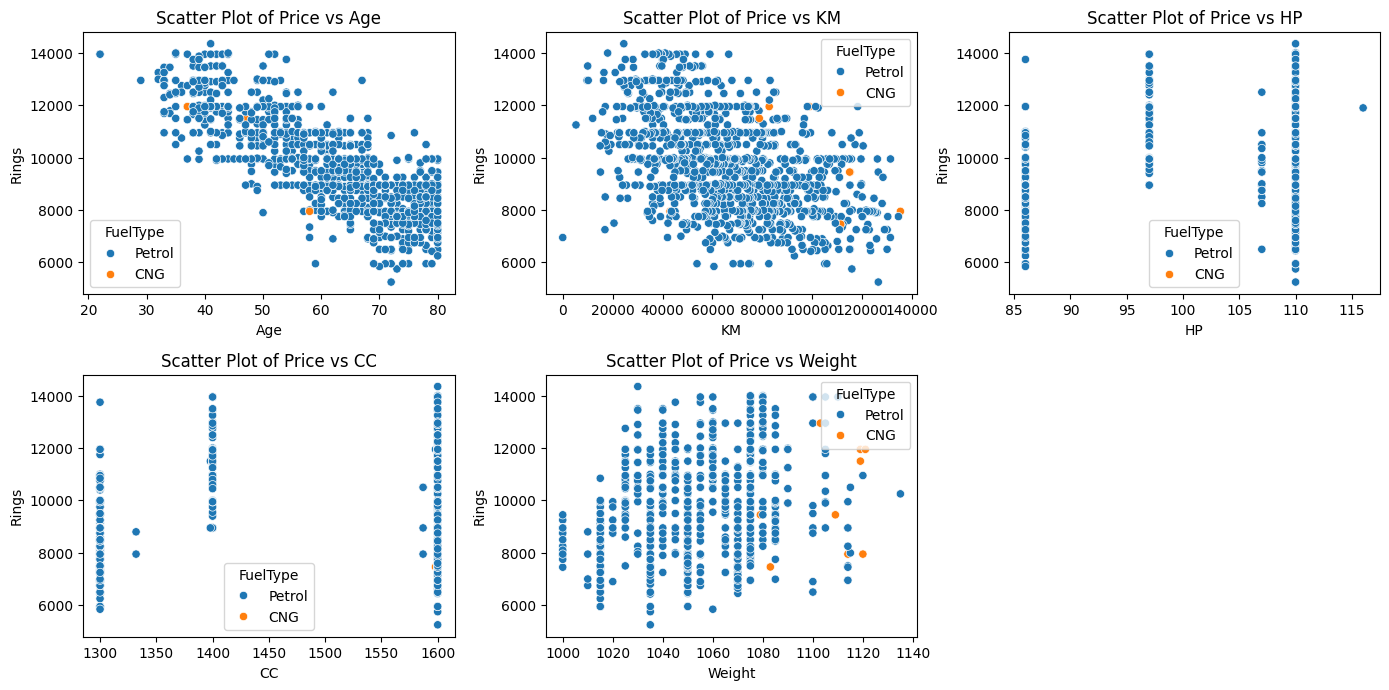

In [ ]:
features = ['Age', 'KM', 'HP', 'CC', 'Weight']


plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=feature, y='Price', hue='FuelType')
    plt.title(f'Scatter Plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Rings')

plt.tight_layout()
plt.show()

pairplot

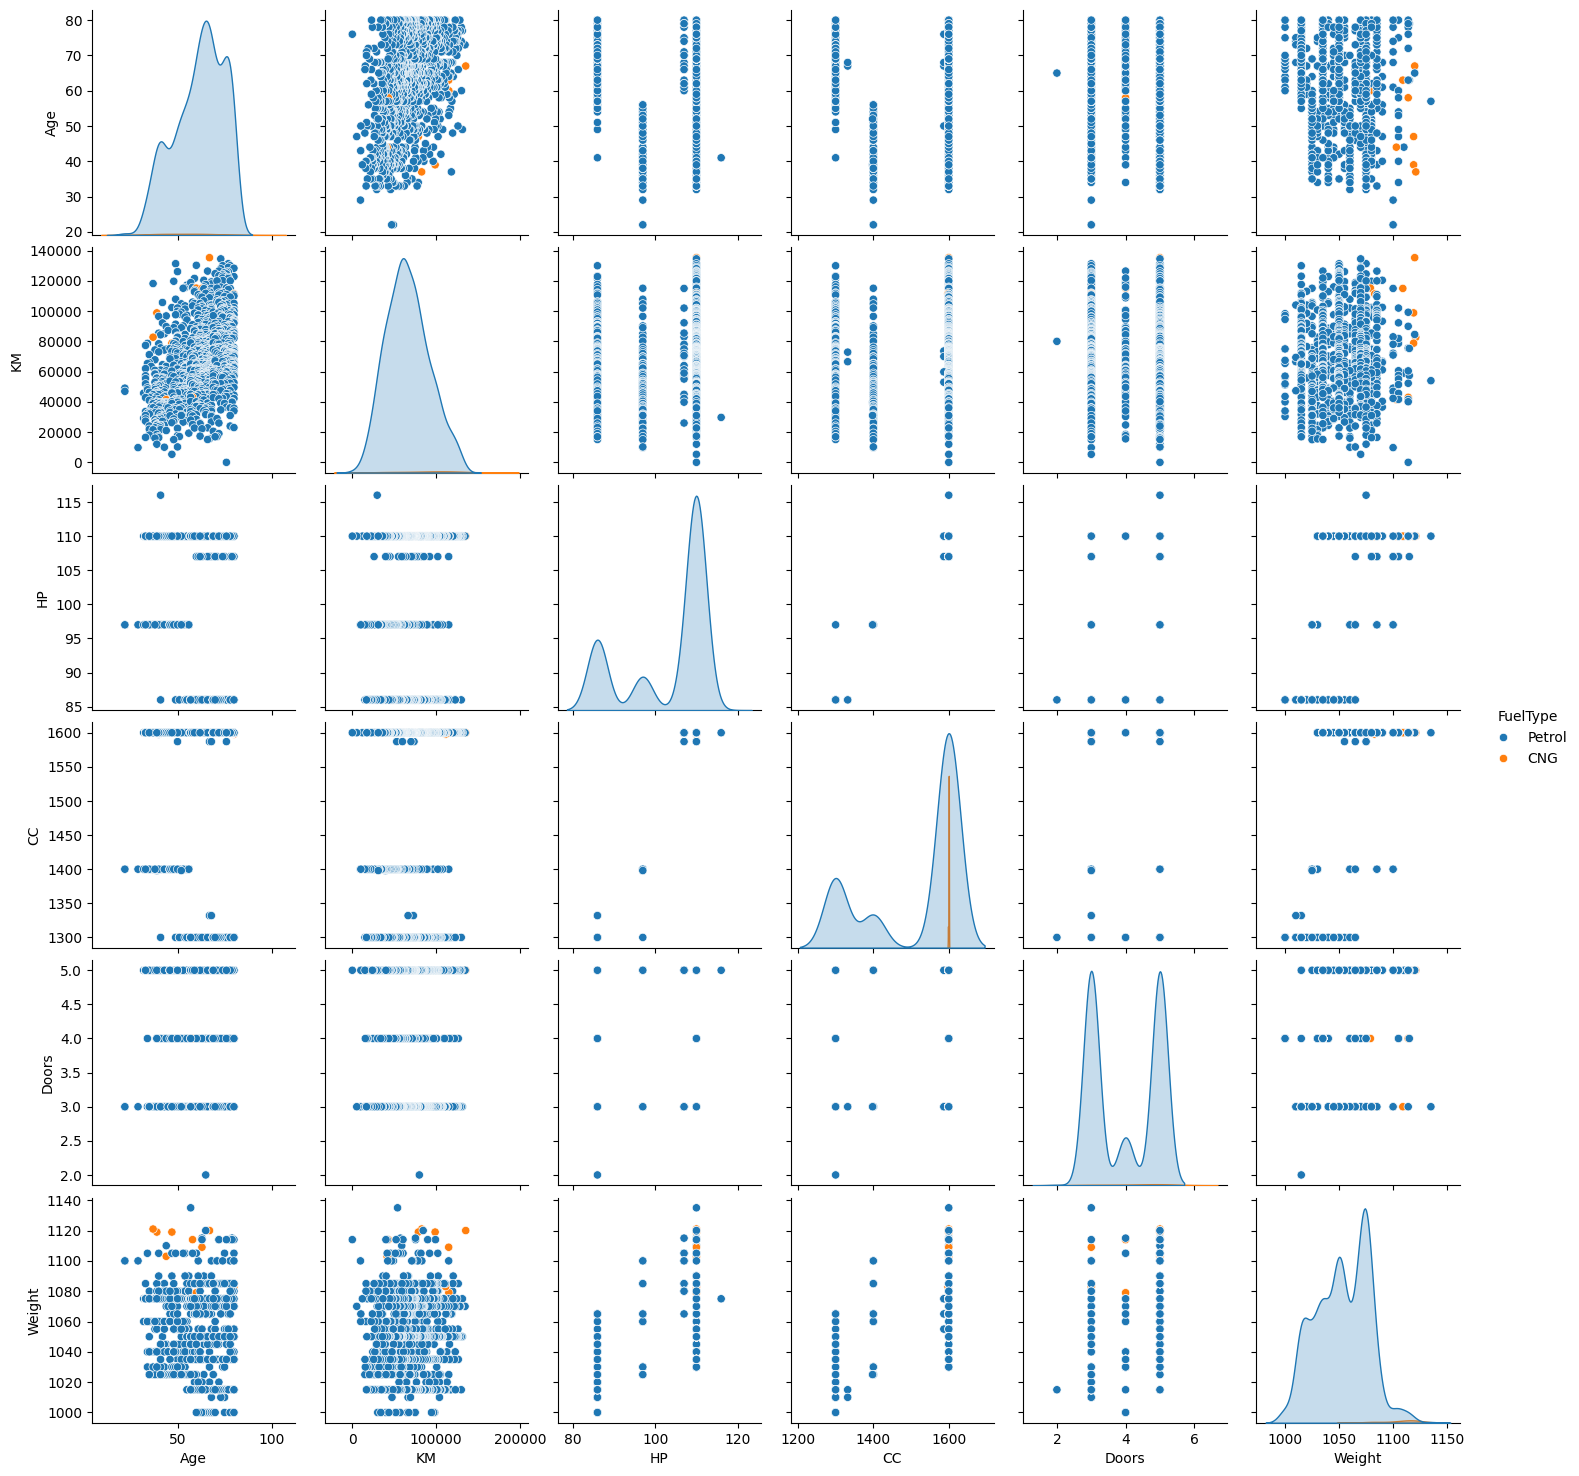

In [ ]:
sns.pairplot(data, hue='FuelType', vars=['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'])
plt.show()

Ma trận tương quan

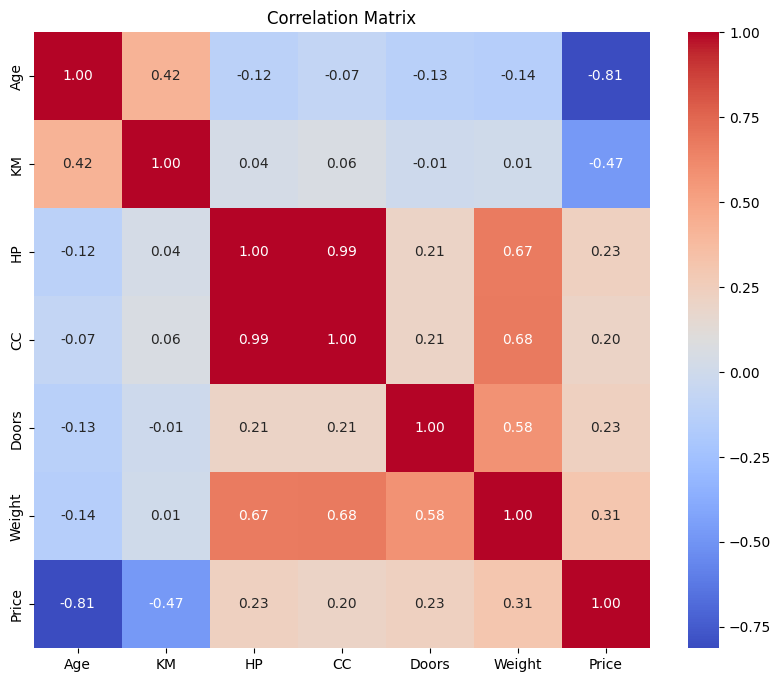

In [ ]:
numeric_cols = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Price']

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

KIỂM TRA CÁC GIÁ TRỊ NGOẠI LAI

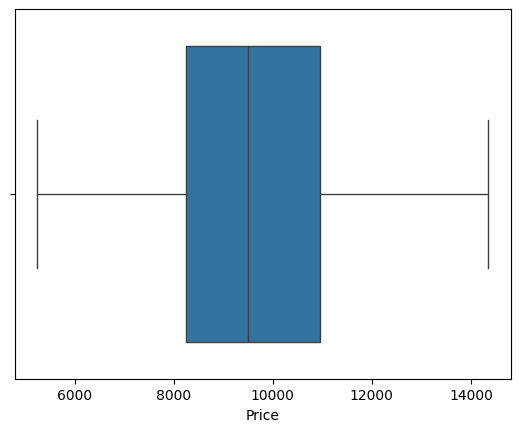

In [ ]:
sns.boxplot(data=data, x='Price')
plt.show()

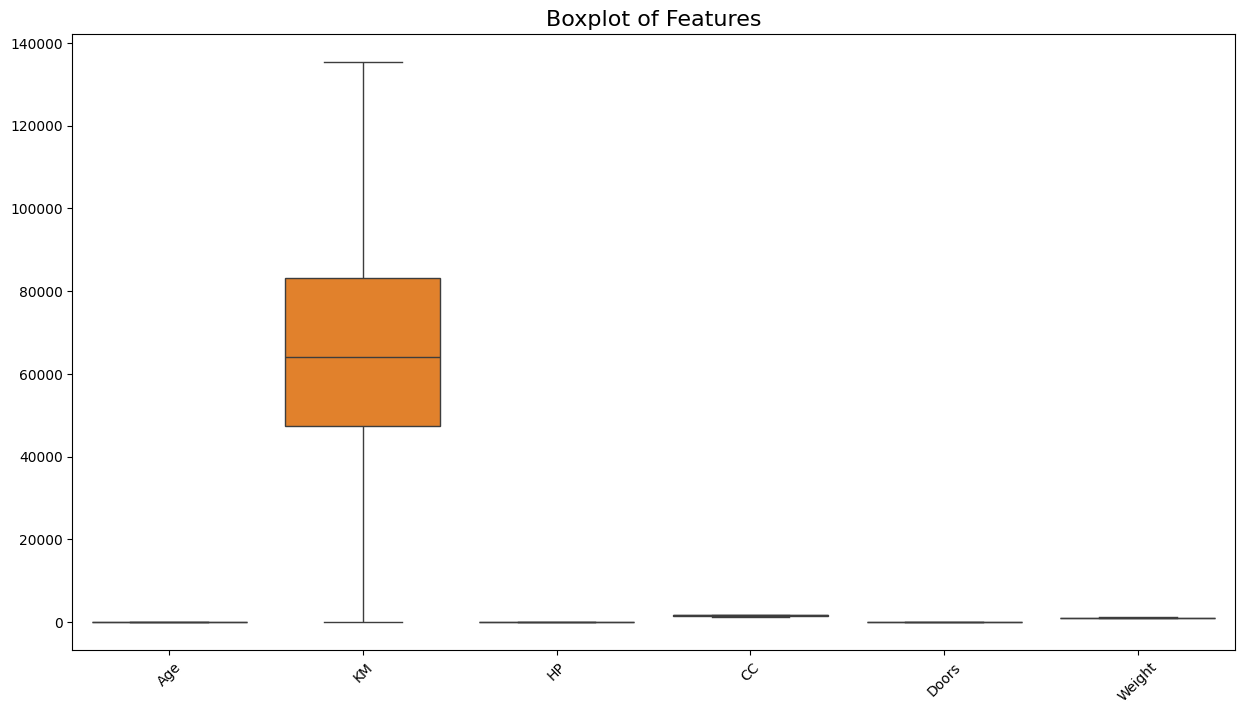

In [ ]:
features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']

plt.figure(figsize=(15, 8))
sns.boxplot(data=data[features])
plt.title('Boxplot of Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

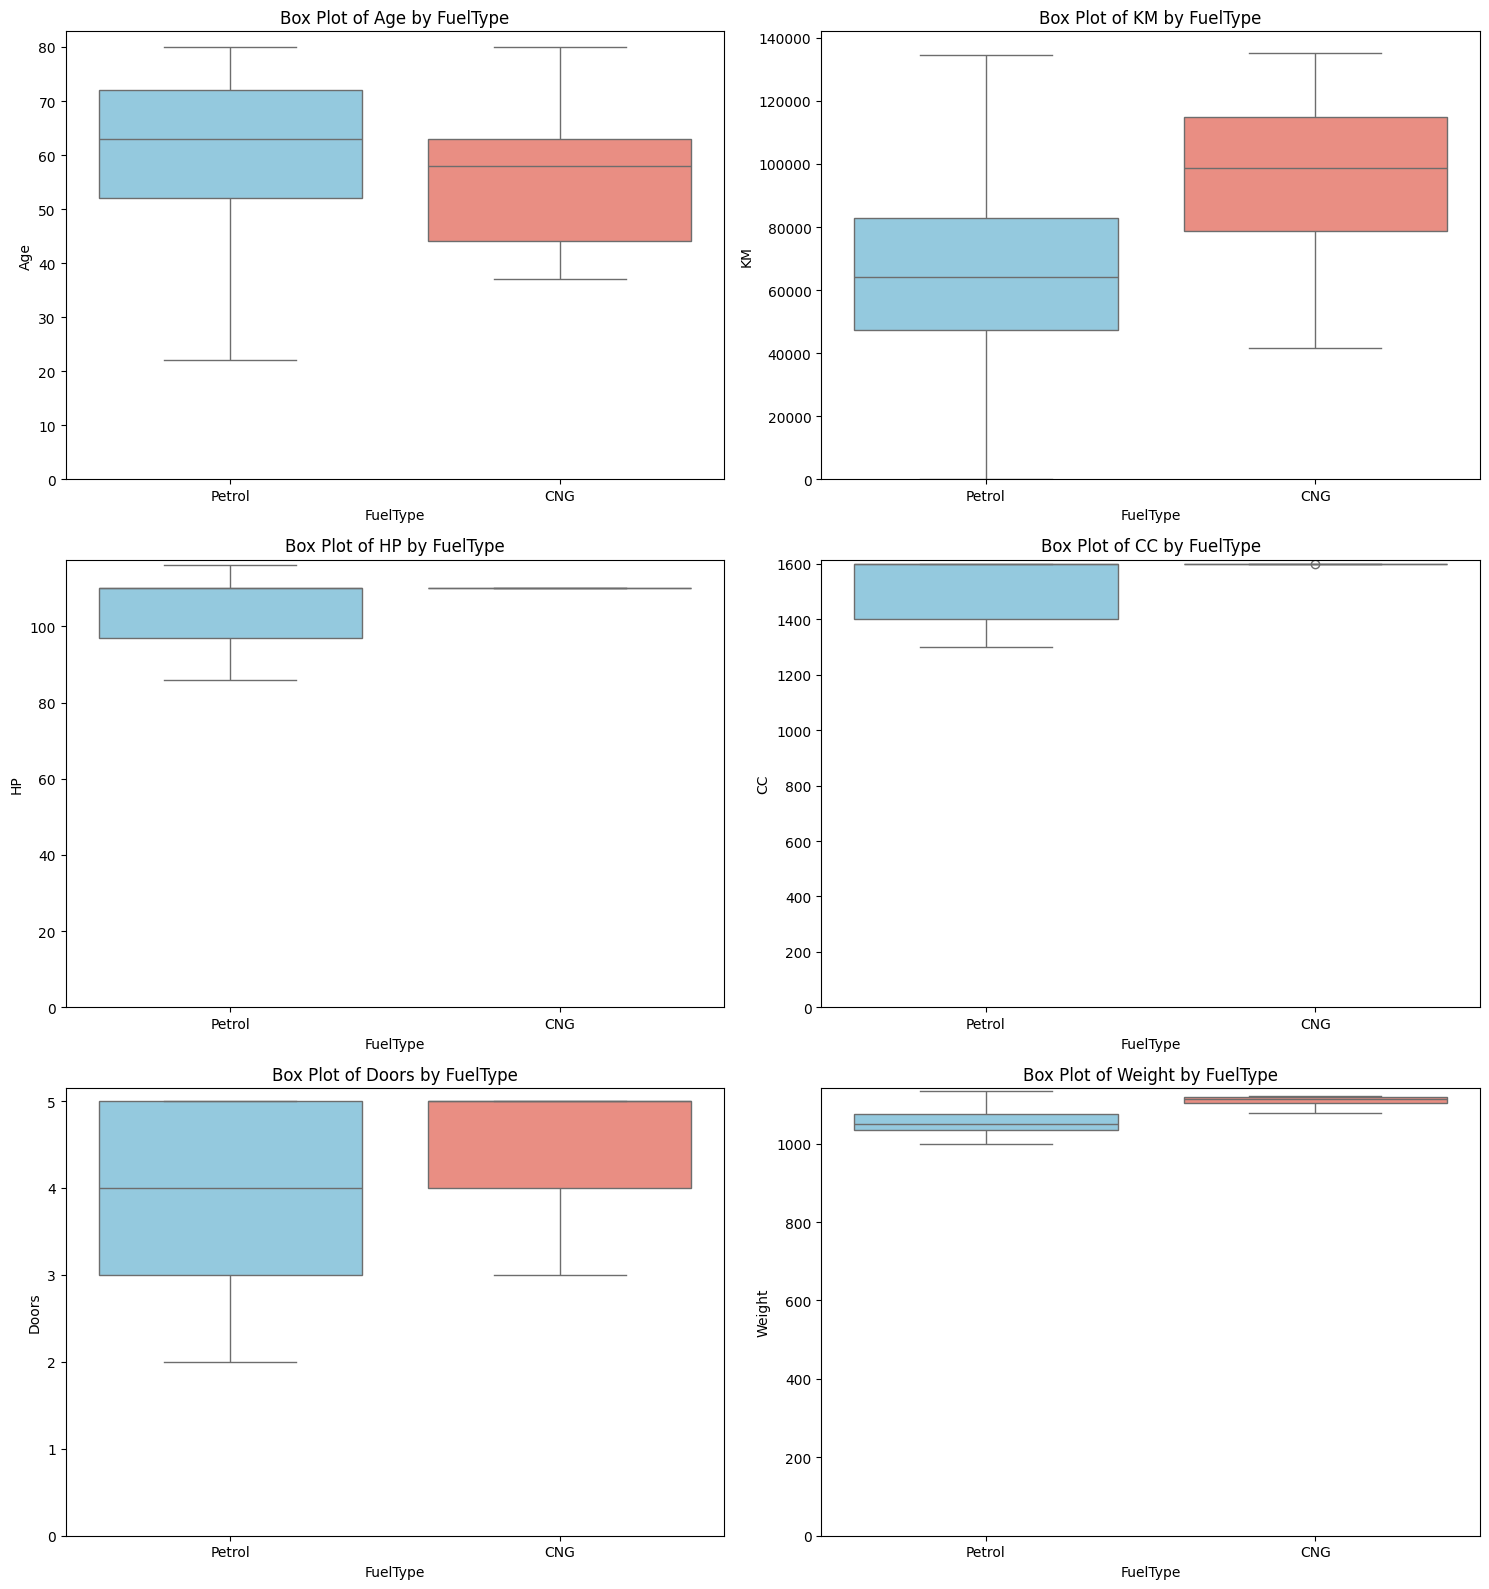

In [ ]:

# Thiết lập màu sắc cho mỗi giới tính
palette = {'Petrol': 'skyblue', 'Diesel': 'lightgreen', 'CNG': 'salmon'}

# Các đặc trưng cần vẽ
features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']

# Tạo một figure với kích thước phù hợp
plt.figure(figsize=(15, 16))  # Tăng chiều cao lên 16 để làm cho boxplot cao hơn

# Vẽ box plot cho mỗi đặc trưng với hue là 'Sex'
for idx, feature in enumerate(features):
    plt.subplot(3, 2, idx + 1)  # Tạo lưới cho các biểu đồ
    sns.boxplot(x='FuelType', y=feature, data=data, hue='FuelType', palette=palette, dodge=False, legend=False)  # Đặt hue và tắt legend
    plt.title(f'Box Plot of {feature} by FuelType')
    plt.xticks(rotation=0)  # Điều chỉnh độ xoay cho dễ nhìn
    plt.ylim(bottom=0)  # Nếu cần, có thể đặt giới hạn thấp cho trục y

# Đảm bảo các subplot không chồng chéo lên nhau
plt.tight_layout()
plt.show()


PREPROCESS


Tên các cột trong dữ liệu:
Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')


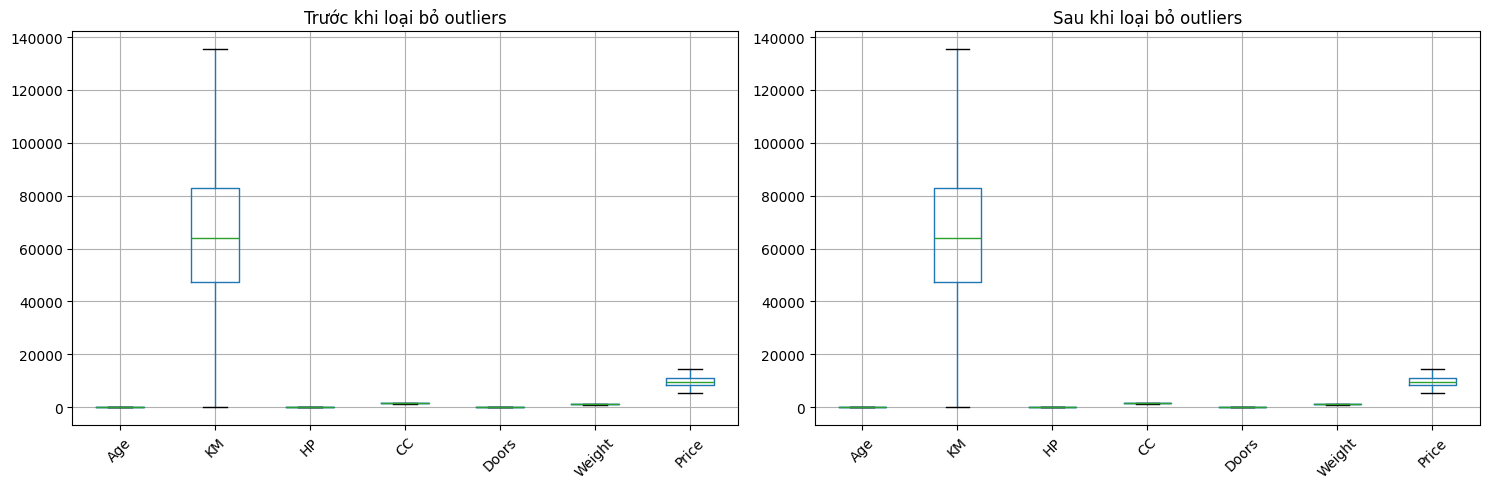


Thông tin về outliers:
------------------------------------------------------------
Biến             Số outliers    Tỷ lệ %   Giới hạn dưới   Giới hạn trên
------------------------------------------------------------
Age                        0       0.00          22.000         102.000
KM                         0       0.00       -6117.625      136569.375
HP                         0       0.00          77.500         129.500
CC                         0       0.00        1100.000        1900.000
Doors                      0       0.00           0.000           8.000
Weight                     0       0.00         975.000        1135.000
Price                      0       0.00        4200.000       15000.000

Thông tin tổng quát:
Số mẫu ban đầu: 1096
Số mẫu sau khi loại bỏ outliers: 1096
Số mẫu bị loại bỏ: 0
Tỷ lệ mẫu được giữ lại: 100.00%

So sánh thống kê mô tả:

Trước khi loại bỏ outliers:
              Price          Age             KM           HP     MetColor    Automatic    

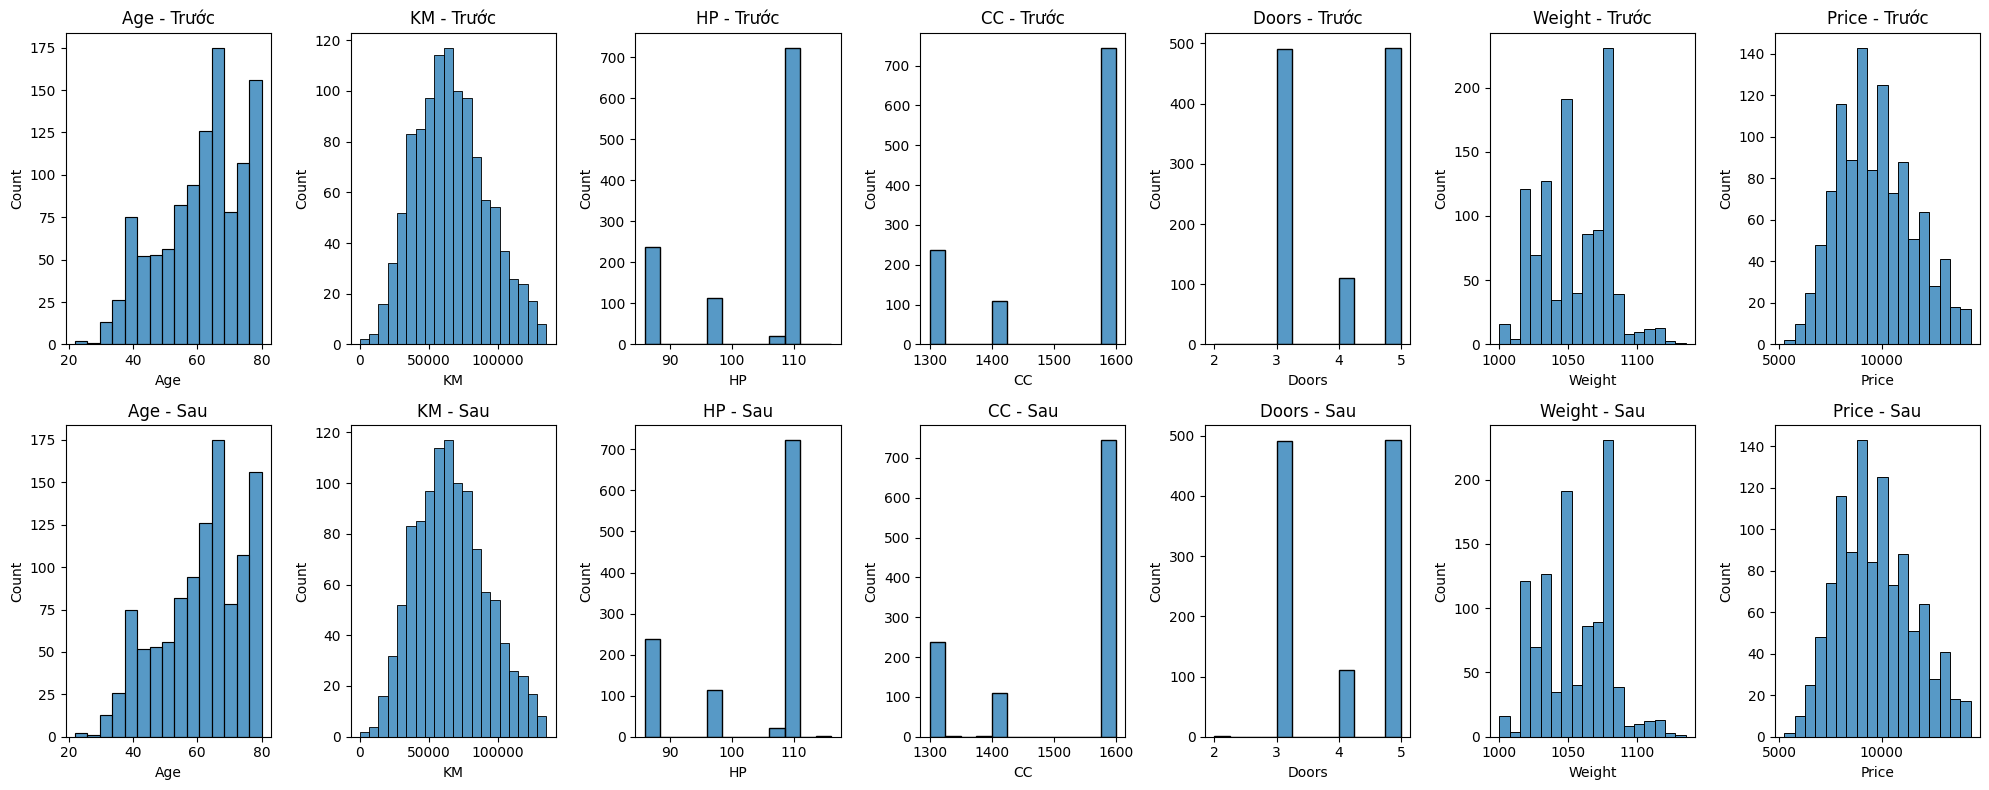

In [ ]:

data = pd.read_csv('ToyotaCorolla.csv')
print("Tên các cột trong dữ liệu:")
print(data.columns)

def analyze_and_remove_outliers(data):
    """
    Phân tích và loại bỏ outliers cho dữ liệu ToyotaCorolla
    """
    numeric_columns = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Price']

    data_clean = data.copy()
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    data_clean[numeric_columns].boxplot()
    plt.title('Trước khi loại bỏ outliers')
    plt.xticks(rotation=45)

    outliers_info = {}

    for column in numeric_columns:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_clean[(data_clean[column] < lower_bound) |
                           (data_clean[column] > upper_bound)][column]
        outliers_info[column] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(data_clean)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        data_clean = data_clean[(data_clean[column] >= lower_bound) &
                           (data_clean[column] <= upper_bound)]

    plt.subplot(1, 2, 2)
    data_clean[numeric_columns].boxplot()
    plt.title('Sau khi loại bỏ outliers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\nThông tin về outliers:")
    print("-" * 60)
    print(f"{'Biến':<15} {'Số outliers':>12} {'Tỷ lệ %':>10} {'Giới hạn dưới':>15} {'Giới hạn trên':>15}")
    print("-" * 60)
    for col, info in outliers_info.items():
        print(f"{col:<15} {info['count']:>12} {info['percentage']:>10.2f} {info['lower_bound']:>15.3f} {info['upper_bound']:>15.3f}")

    print("\nThông tin tổng quát:")
    print(f"Số mẫu ban đầu: {len(data)}")
    print(f"Số mẫu sau khi loại bỏ outliers: {len(data_clean)}")
    print(f"Số mẫu bị loại bỏ: {len(data) - len(data_clean)}")
    print(f"Tỷ lệ mẫu được giữ lại: {(len(data_clean) / len(data)) * 100:.2f}%")

    return data_clean
data_clean = analyze_and_remove_outliers(data)

def compare_statistics(data_original, data_clean):
    print("\nSo sánh thống kê mô tả:")
    print("\nTrước khi loại bỏ outliers:")
    print(data_original.describe())
    print("\nSau khi loại bỏ outliers:")
    print(data_clean.describe())
compare_statistics(data, data_clean)

numeric_columns = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Price']


def plot_distributions(data_original, data_clean, columns):
    n_cols = len(columns)
    fig, axes = plt.subplots(2, n_cols, figsize=(20, 8))

    for i, col in enumerate(columns):
        sns.histplot(data=data_original, x=col, ax=axes[0, i])
        axes[0, i].set_title(f'{col} - Trước')
        sns.histplot(data=data_clean, x=col, ax=axes[1, i])
        axes[1, i].set_title(f'{col} - Sau')

    plt.tight_layout()
    plt.show()

plot_distributions(data, data_clean, numeric_columns)
data_clean.to_csv('ToyotaCorolla.csv', index=False)


#### Tiền xử lý

In [ ]:
numeric_features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']
categorical_features = ['FuelType', 'MetColor', 'Automatic']  # đã LabelEncode sẵn

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='passthrough'  # giữ FuelType, MetColor, Automatic
)


Dữ liệu đã chuẩn hóa và được lưu lại vào file 'toyota_clean.csv'.


#### Chia dữ liệu

In [ ]:
# Đọc dữ liệu đã xử lý
data_clean = pd.read_csv('toyota_clean.csv')
# Chia dữ liệu
X = data_clean.drop('Price', axis=1)
y = data_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(data_clean.columns)


Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')


### Xây dựng mô hình

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\sit

                               Model   CV Mean MSE      Test MSE     Test RMSE      Test MAE       TestRSE  Execution Time
0                  Linear Regression  9.042831e+05  8.946726e+05  9.458700e+02  7.536000e+02  2.900000e-01        0.002810
1                   Ridge Regression  9.020282e+05  8.941406e+05  9.455900e+02  7.536000e+02  2.900000e-01        0.003076
2                      Decision Tree  1.606412e+06  1.686932e+06  1.298820e+03  1.023840e+03  5.400000e-01        0.008369
3                      Random Forest  9.644617e+05  8.748362e+05  9.353300e+02  7.528700e+02  2.800000e-01        0.465274
4                  Gradient Boosting  8.527091e+05  8.122088e+05  9.012300e+02  7.228700e+02  2.600000e-01        0.158430
5                                SVR  3.258123e+06  3.102880e+06  1.761500e+03  1.423600e+03  1.000000e+00        0.058959
6                         Linear SVR  3.688012e+06  3.345484e+06  1.829070e+03  1.473060e+03  1.080000e+00        0.168424
7               

C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\2575102410.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test RMSE', data=results_df, palette='viridis', legend=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1652\2575102410.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


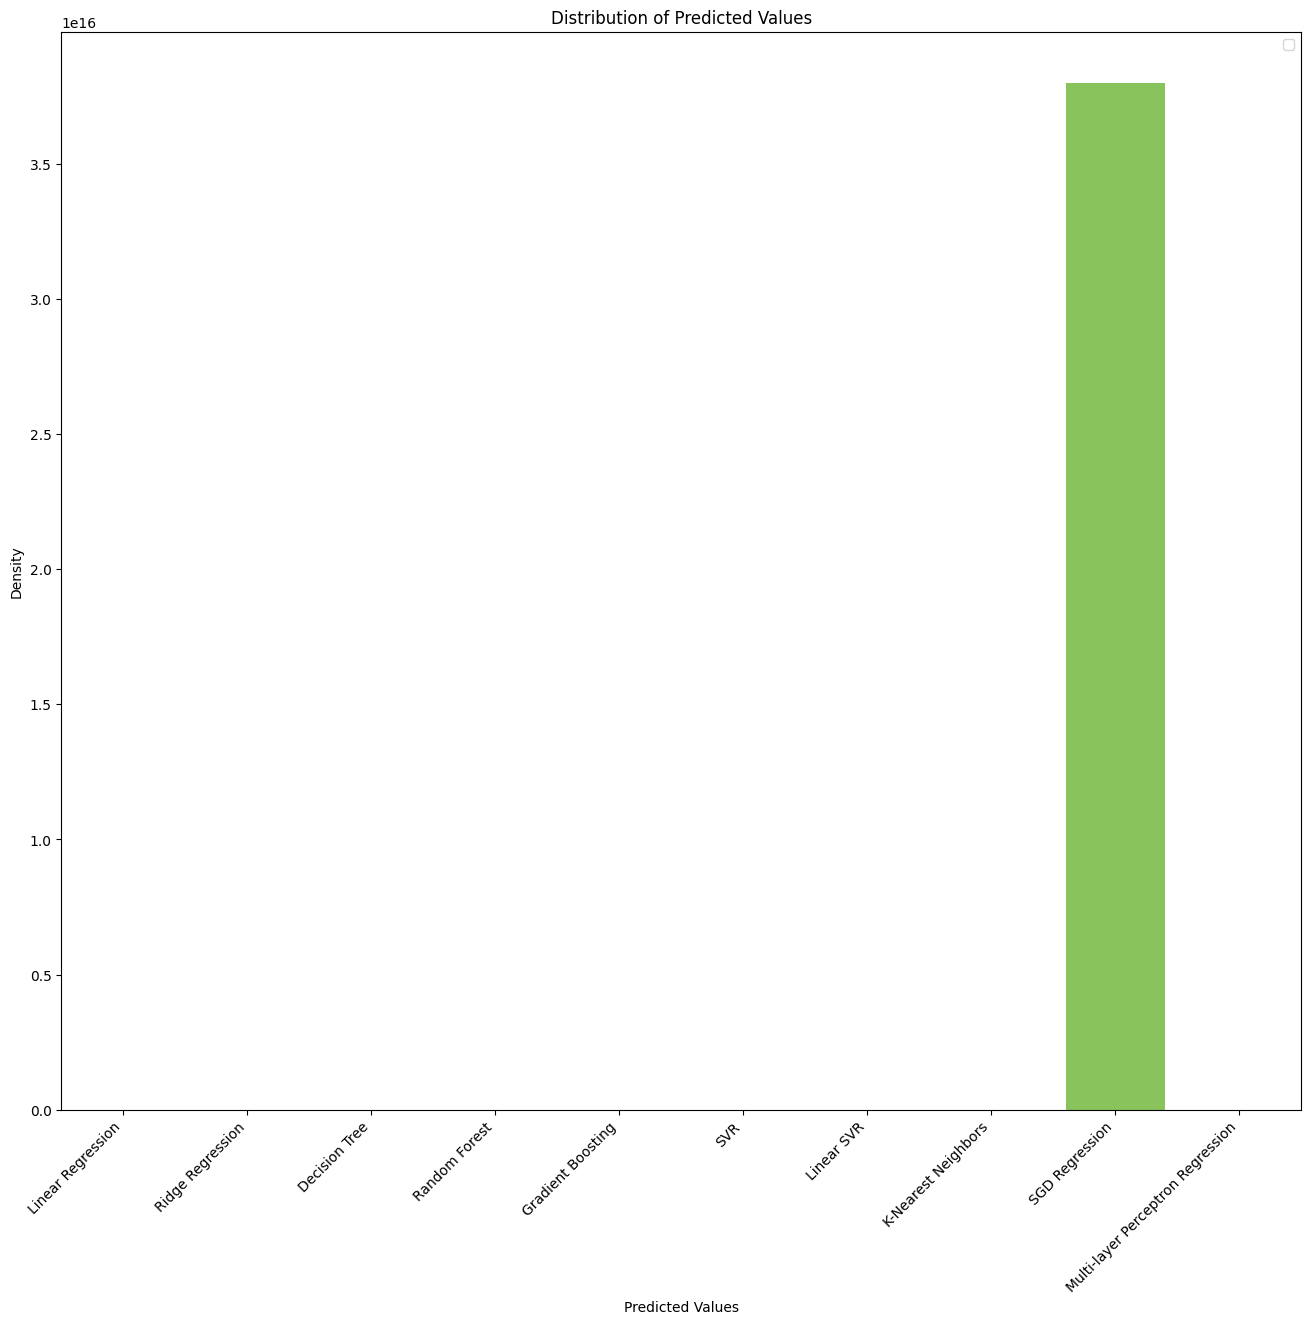

ValueError: A given column is not a column of the dataframe

<Figure size 640x480 with 0 Axes>

In [ ]:
    # Danh sách các mô hình
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('Linear SVR', LinearSVR(max_iter=5000)),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('SGD Regression', SGDRegressor(max_iter=5000, tol=1e-4)),  # Thêm các tham số để SGD có thể hội tụ
    ('Multi-layer Perceptron Regression', MLPRegressor(max_iter=2000))  # Đảm bảo rằng MLP cũng có đủ số lần lặp
    ]

# Tạo DataFrame để lưu trữ kết quả
results = []

    # Function to evaluate model
def evaluate_model(name, model):

    # K-fold cross-validation
     cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
     mean_mse = -cv_scores.mean()


    # Đo thời gian thực thi
     start_time = timer()  # Bắt đầu đo thời gian
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     execution_time = timer() - start_time  # Tính toán thời gian thực thi

     mse = mean_squared_error(y_test, y_pred)
     rmse = np.sqrt(mse)
     mae = mean_absolute_error(y_test, y_pred)
     rse = mse / np.var(y_test)  # Relative Squared Error

    # Thêm kết quả vào danh sách
     results.append([
         name,
         round(mean_mse, 2),  # Thêm CV Mean MSE
         round(mse, 2),  # Làm tròn MSE
         round(rmse, 2),  # Làm tròn RMSE
         round(mae, 2),  # Làm tròn MAE
         round(rse, 2),  # Làm tròn RSE
         round(execution_time, 6)  # Làm tròn thời gian
    ])

    # Loop through the models
for name, model in models:
     evaluate_model(name, model)
# Tạo DataFrame cho kết quả
results_df = pd.DataFrame(results, columns=['Model', 'CV Mean MSE', 'Test MSE', 'Test RMSE', 'Test MAE', 'TestRSE', 'Execution Time'])
print(results_df)

# Biểu đồ phân phối của giá trị dự đoán so với giá trị thực tế
plt.figure(figsize=(16, 14))

# Đặt các màu sắc rõ ràng cho từng mô hình
#colors = sns.color_palette("Set2", len(models))
sns.barplot(x='Model', y='Test RMSE', data=results_df, palette='viridis', legend=False)
plt.title('So sánh RMSE của các mô hình ToyotaCorolla')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.tight_layout()


# Kiểm tra độ lệch và phương sai
bias_variance_results = []  # Tạo danh sách riêng để lưu kết quả độ lệch và phương sai

for name, model in models:
     pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
     pipe.fit(X_train, y_train)
     y_pred = pipe.predict(X_test)
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
    # Tính độ lệch và phương sai
     bias = np.mean(y_test - y_pred)
     variance = np.var(y_pred)

    # Thêm kết quả vào danh sách
     bias_variance_results.append({'Model': name, 'Bias': round(bias, 2), 'Variance': round(variance, 2)})

# Chuyển đổi danh sách kết quả thành DataFrame
bias_variance_df = pd.DataFrame(bias_variance_results)

# Hiển thị bảng kết quả độ lệch và phương sai
print("\nĐộ lệch (Bias) và Phương sai (Variance):")
print(bias_variance_df)

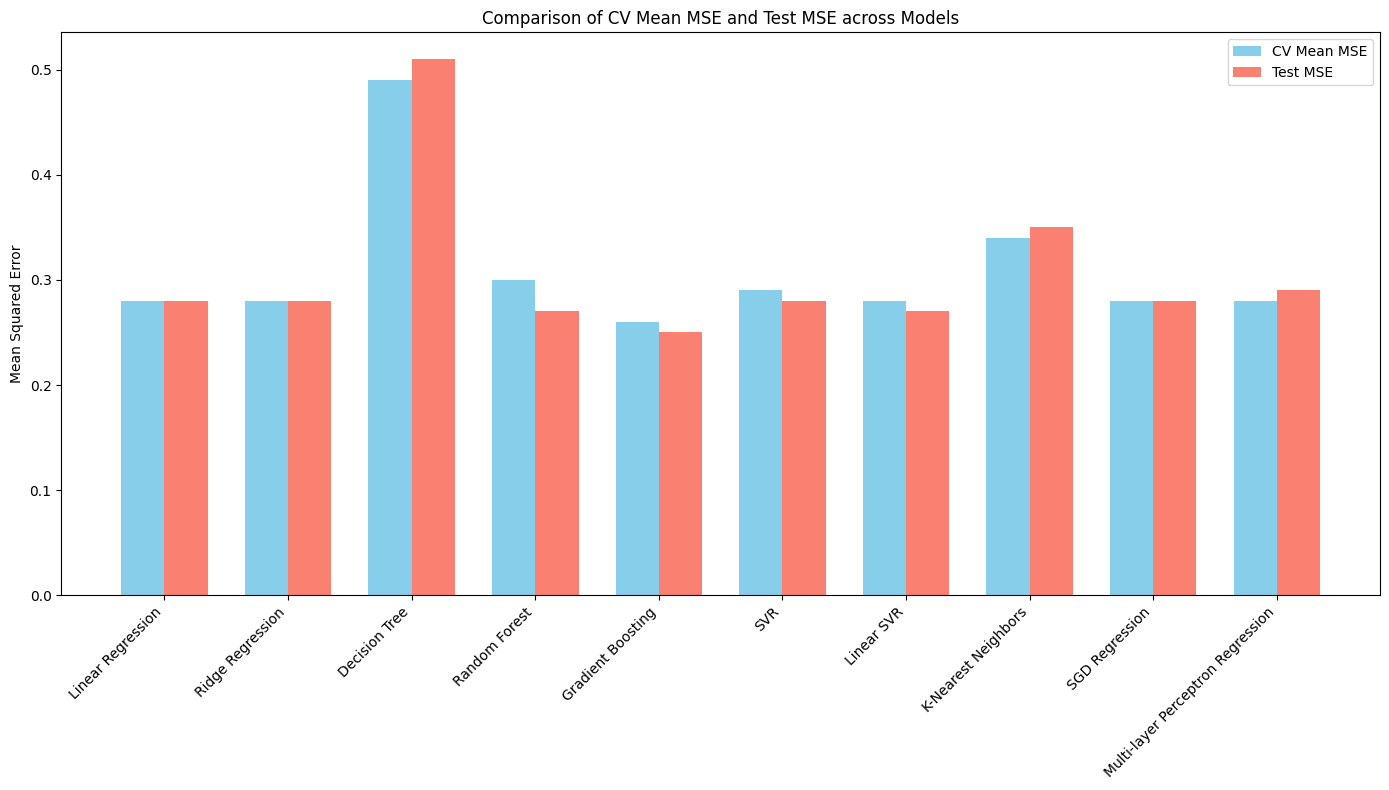

In [ ]:
# Tạo biểu đồ cột nhóm cho CV Mean MSE và Test MSE
plt.figure(figsize=(14, 8))

# Vẽ biểu đồ cột nhóm
bar_width = 0.35
index = np.arange(len(results_df))

# Cột cho CV Mean MSE
plt.bar(index, results_df['CV Mean MSE'], bar_width, label='CV Mean MSE', color='skyblue')

# Cột cho Test MSE
plt.bar(index + bar_width, results_df['Test MSE'], bar_width, label='Test MSE', color='salmon')

# Thiết lập nhãn trục và tiêu đề
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of CV Mean MSE and Test MSE across Models')
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45, ha='right')
plt.xlabel('')  # Bỏ nhãn trục x

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


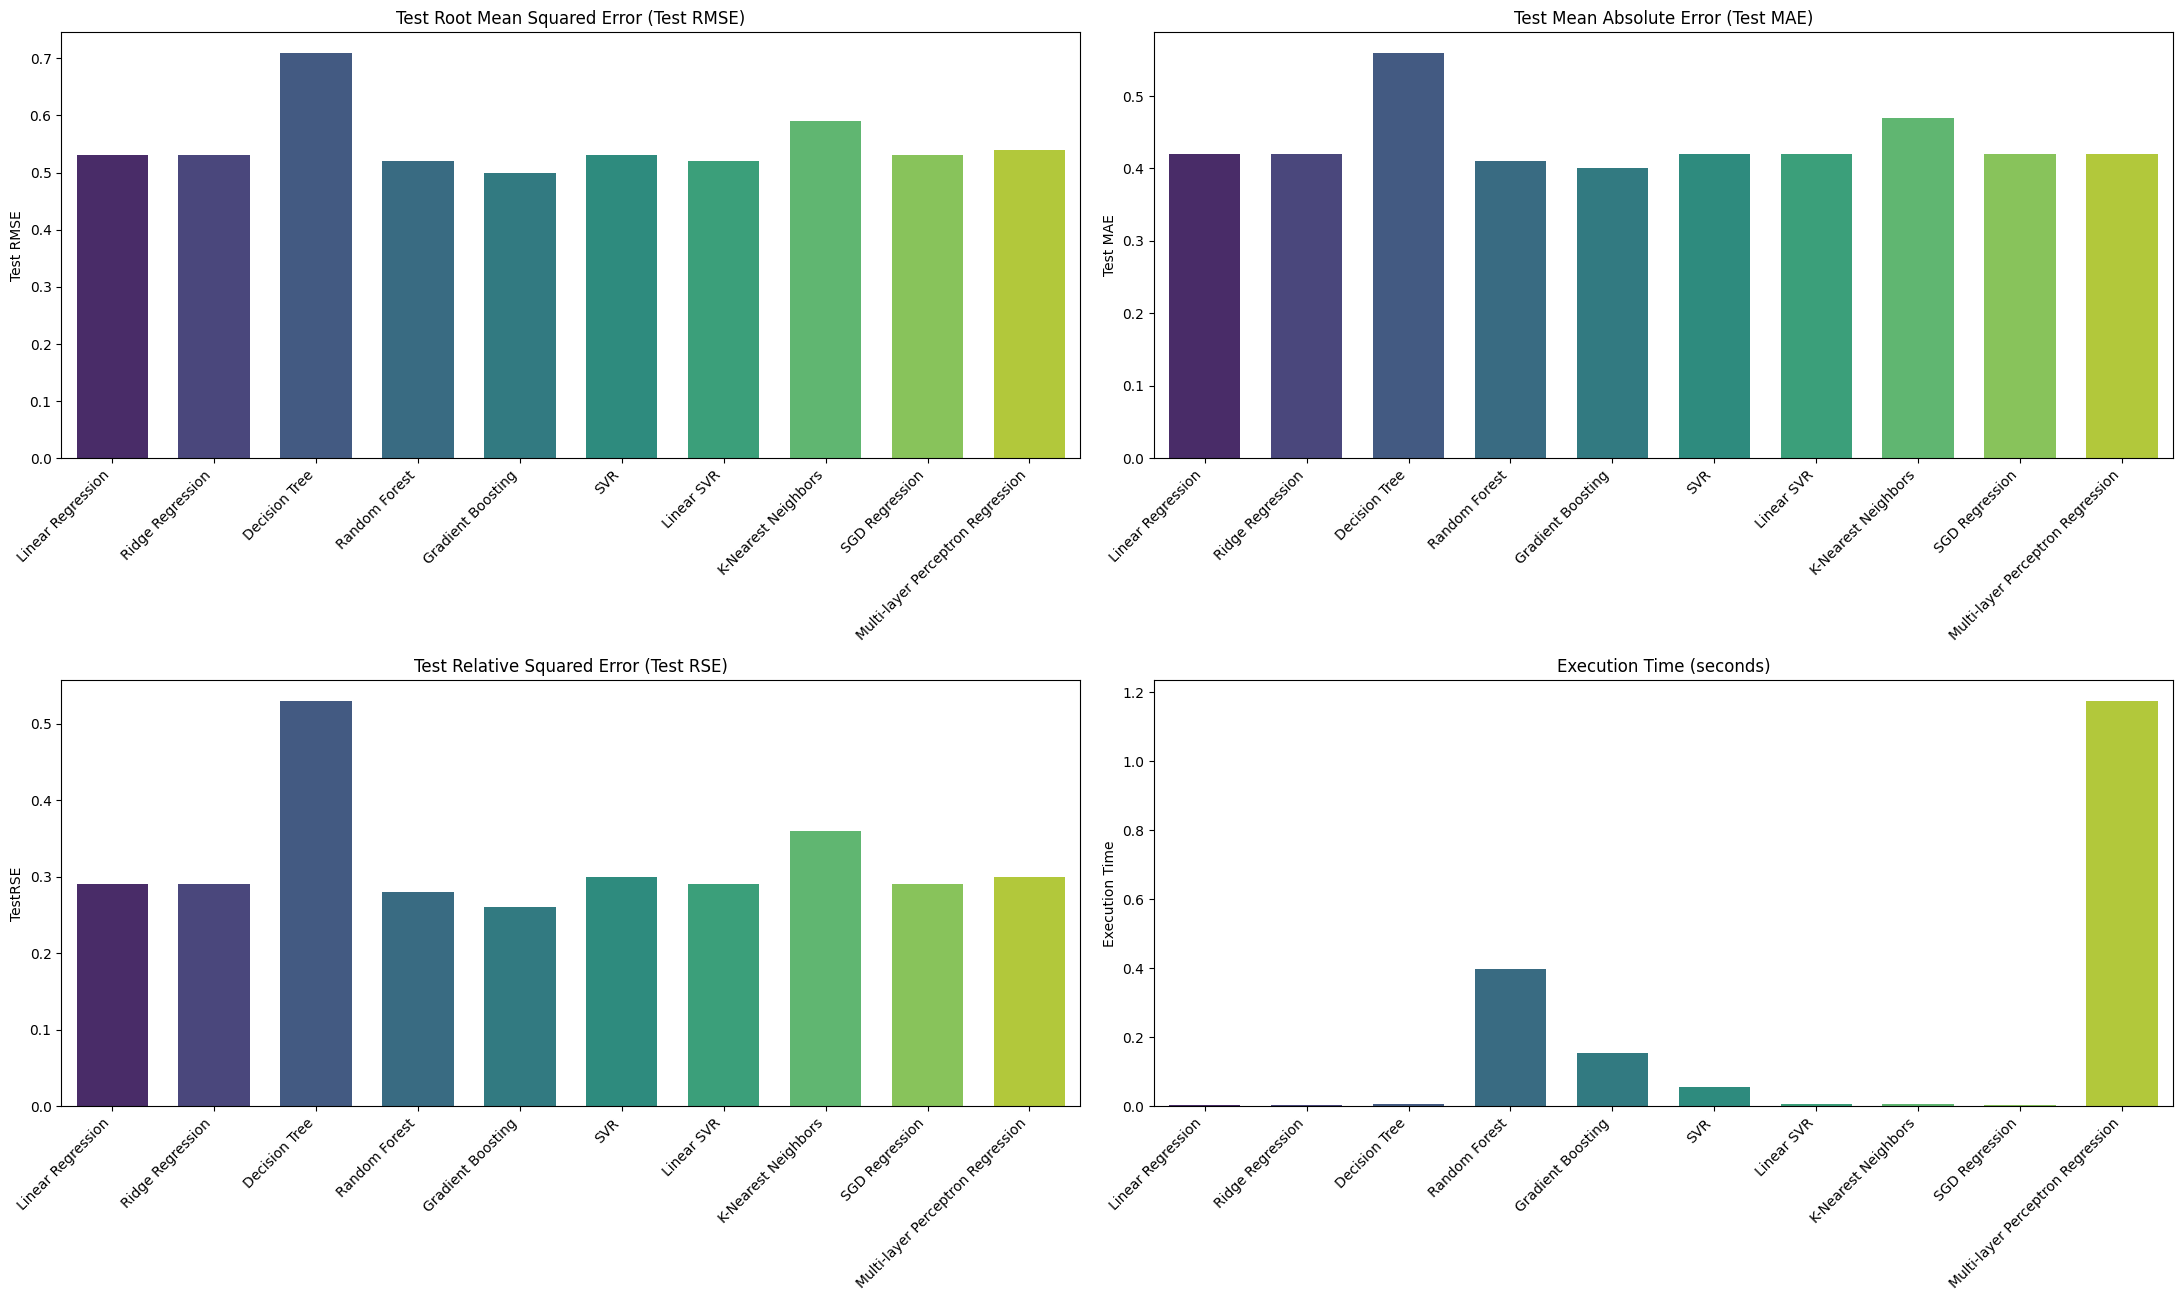

In [ ]:
# Thiết lập cỡ hình và giao diện biểu đồ
plt.figure(figsize=(22, 24))

# Test RMSE
plt.subplot(4, 2, 3)
sns.barplot(x='Model', y='Test RMSE', data=results_df, hue='Model', palette='viridis', legend=False, dodge=False, width=0.7)
plt.title('Test Root Mean Squared Error (Test RMSE)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')  # Bỏ nhãn trục x

# Test MAE
plt.subplot(4, 2, 4)
sns.barplot(x='Model', y='Test MAE', data=results_df, hue='Model', palette='viridis', legend=False, dodge=False, width=0.7)
plt.title('Test Mean Absolute Error (Test MAE)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')  # Bỏ nhãn trục x

# Test RSE
plt.subplot(4, 2, 5)
sns.barplot(x='Model', y='TestRSE', data=results_df, hue='Model', palette='viridis', legend=False, dodge=False, width=0.7)
plt.title('Test Relative Squared Error (Test RSE)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')  # Bỏ nhãn trục x

# Execution Time
plt.subplot(4, 2, 6)
sns.barplot(x='Model', y='Execution Time', data=results_df, hue='Model', palette='viridis', legend=False, dodge=False, width=0.7)
plt.title('Execution Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')  # Bỏ nhãn trục x

# Tinh chỉnh layout
plt.tight_layout()
plt.show()


### k-folk

In [ ]:
results = []

for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # cross_val_score trực tiếp với X_train, y_train
    train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    test_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

    train_mean_mse = -train_scores.mean()
    test_mean_mse = -test_scores.mean()

    results.append({
        'Model': name,
        'Train Mean MSE (5-fold CV)': train_mean_mse,
        'Test Mean MSE': test_mean_mse
    })

results_df = pd.DataFrame(results).round(2)
print(results_df)


                               Model  Train Mean MSE (5-fold CV)  Test Mean MSE
0                  Linear Regression                        0.28           0.28
1                   Ridge Regression                        0.28           0.28
2                      Decision Tree                        0.49           0.55
3                      Random Forest                        0.30           0.30
4                  Gradient Boosting                        0.26           0.28
5                                SVR                        0.29           0.30
6                         Linear SVR                        0.28           0.29
7                K-Nearest Neighbors                        0.34           0.34
8                     SGD Regression                        0.28           0.29
9  Multi-layer Perceptron Regression                        0.29           0.31


### Siêu tham số

In [ ]:
# Tạo các bộ siêu tham số cho từng mô hình cần tối ưu
param_grids = {
    'Decision Tree': {
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    'K-Nearest Neighbors': {
        'regressor__n_neighbors': [3, 5, 7, 9],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__p': [1, 2]
    },
    'Multi-layer Perceptron Regression': {
        'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'regressor__activation': ['tanh', 'relu'],
        'regressor__learning_rate': ['constant', 'adaptive'],
        'regressor__alpha': [0.0001, 0.001, 0.01]
    },
    'SVR': {
        'regressor__C': [0.1, 1, 10],
        'regressor__epsilon': [0.1, 0.2, 0.5],
        'regressor__kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    }
}

# Thực hiện tìm kiếm GridSearchCV cho các mô hình có bộ siêu tham số
best_models = {}

# Lặp qua từng mô hình và thực hiện GridSearchCV
for model_name, model in models:
    if model_name in param_grids:
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
        grid_search = GridSearchCV(estimator=pipe, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')

        grid_search.fit(X_train, y_train)

        best_models[model_name] = grid_search.best_estimator_
        print(f"Siêu tham số tốt nhất cho {model_name}: {grid_search.best_params_}")
        print(f"Giá trị MSE tốt nhất trên tập huấn luyện: {-grid_search.best_score_:.2f}")
        print("-" * 80)

# Danh sách lưu kết quả
results = []

# Sử dụng vòng lặp cho các mô hình tối ưu
for model_name, model_pipeline in best_models.items():
    for _ in range(1):  # Số lần chạy mô hình
        # Huấn luyện mô hình
        model_pipeline.fit(X_train, y_train)

        start_time = timer()  # Bắt đầu đo thời gian
        # Dự đoán và đánh giá
        y_pred = model_pipeline.predict(X_test)
        execution_time = timer() - start_time  # Tính toán thời gian thực thi

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rse = mse / np.var(y_test)
        # Thêm kết quả vào danh sách
        results.append([
            model_name,
            round(mse, 2),  # Làm tròn MSE
            round(rmse, 2),  # Làm tròn RMSE
            round(mae, 2),  # Làm tròn MAE
            round(rse, 2),  # Làm tròn RSE
            round(execution_time, 6)  # Làm tròn thời gian
        ])

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'RSE', 'Execution Time'])
print(results_df)

# Đặt các màu sắc rõ ràng cho từng mô hình
colors = sns.color_palette("Set2", len(best_models))

for idx, (name, model_pipeline) in enumerate(best_models.items()):
    y_pred = model_pipeline.predict(X_test)

    # Vẽ đường KDE với màu sắc và độ dày rõ hơn
    sns.kdeplot(y_pred, label=name, color=colors[idx], fill=False, linewidth=2)

plt.title('Distribution of Predicted Values from Optimized Models')
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Khởi tạo danh sách để lưu trữ bias và variance
bias_variance_results = []

# Hiển thị bias và variance cho các mô hình tối ưu
for name, model_pipeline in best_models.items():
    y_pred = model_pipeline.predict(X_test)
    bias = np.mean(y_test - y_pred)
    variance = np.var(y_pred)

    # Thêm kết quả vào danh sách
    bias_variance_results.append([name, round(bias, 2), round(variance, 2)])

# Chuyển đổi kết quả thành DataFrame
bias_variance_df = pd.DataFrame(bias_variance_results, columns=['Model', 'Bias', 'Variance'])

# In bảng kết quả bias và variance
print(bias_variance_df)



NameError: name 'preprocessor' is not defined

                                  Test Score                                        Best Params
Decision Tree                       5.742794  {'regressor__activation': 'tanh', 'regressor__...
Random Forest                       4.462694  {'regressor__activation': 'tanh', 'regressor__...
Gradient Boosting                   4.634411  {'regressor__activation': 'tanh', 'regressor__...
SVR                                 4.474265  {'regressor__activation': 'tanh', 'regressor__...
K-Nearest Neighbors                  4.99315  {'regressor__activation': 'tanh', 'regressor__...
Multi-layer Perceptron Regression   4.228623  {'regressor__activation': 'tanh', 'regressor__...


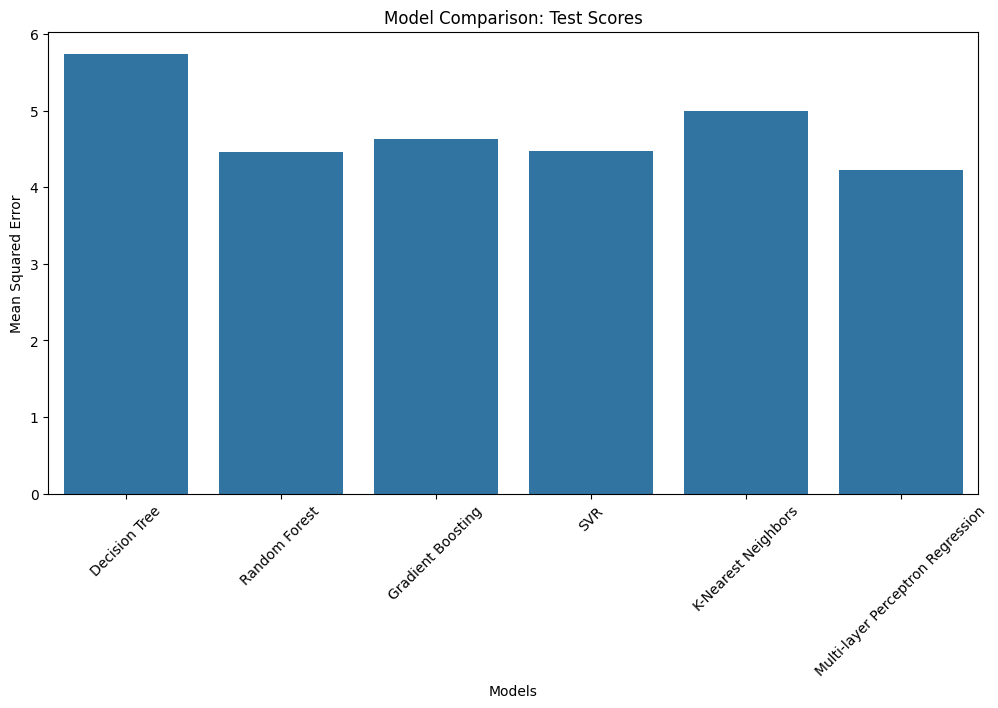

In [ ]:
# Danh sách lưu kết quả
final_results = {}

# Đánh giá các mô hình tối ưu trong best_models
for model_name, model_pipeline in best_models.items():
    # Dự đoán trên tập kiểm tra
    y_pred = model_pipeline.predict(X_test)

    # Tính các chỉ số
    mse = mean_squared_error(y_test, y_pred)

    final_results[model_name] = {
        'Test Score': mse,
        'Best Params': grid_search.best_params_ if model_name in param_grids else {}
    }

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(final_results).T
print(results_df)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='Test Score', data=results_df)
plt.xticks(rotation=45)
plt.title('Model Comparison: Test Scores')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()
